## Stable Diffusion 


In [1]:
!pip install diffusers transformers tokenizers
!pip install accelerate

Note you need to login to use the pre-trained weights! You should register an account at Huggingface, then use one `Access Tokens` to login in the following block.

In [2]:
# from huggingface_hub import notebook_login

# notebook_login()

Make sure you have a runtime with GPU!

## Loading Stable Diffusion

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

def plt_show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [4]:
assert torch.cuda.is_available()
!nvidia-smi

Sun Sep  1 13:09:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8               6W /  80W |     11MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Here `fp16` checkpoint is loaded just to save memory and compute time. if you have a great gpu, you can remove the line `revision="fp16", torch_dtype=torch.float16`.

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True,
    revision="fp16", torch_dtype=torch.float16
).to("cuda")                  ###if gpu is not available then replace cuda with cpu
# Disable the safety checkers
def dummy_checker(images, **kwargs): return images, [False] * images.shape[0]
pipe.safety_checker = dummy_checker

/home/reso/anaconda3/lib/python3.11/site-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/reso/anaconda3/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /home/reso/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/reso/.cache/hug

In [6]:
def dummy_checker(images, **kwargs): return images, [False] * images.shape[0]
pipe.safety_checker = dummy_checker

## Generative Playground

  0%|          | 0/50 [00:00<?, ?it/s]

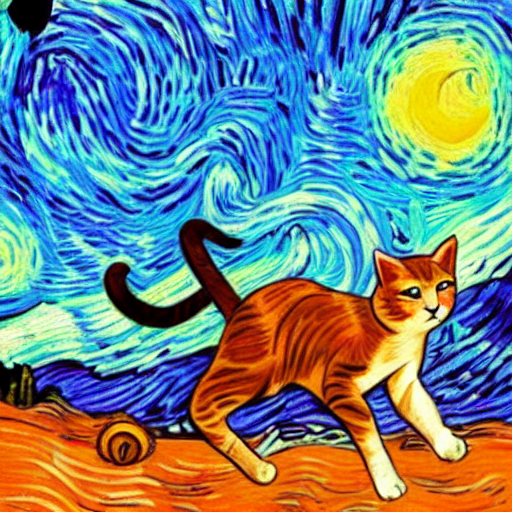

In [7]:
prompt = "a lovely cat running in the desert in Van Gogh style, trending art."
image = pipe(prompt).images[0]  

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat.png")
image

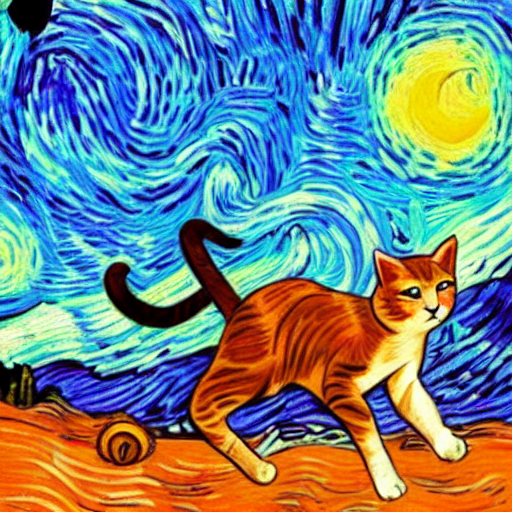

In [8]:
image #  

### Fixing the random seed

  0%|          | 0/50 [00:00<?, ?it/s]

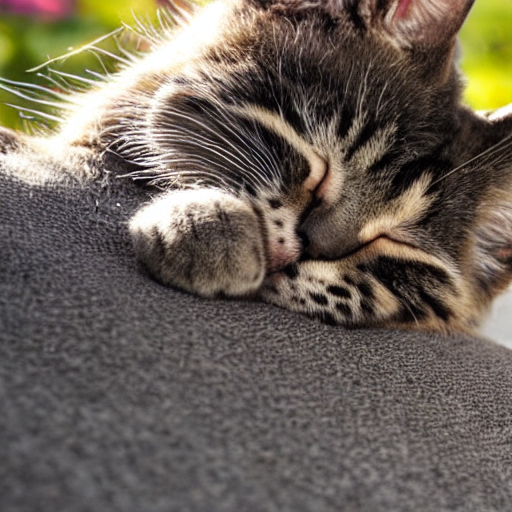

In [9]:
generator = torch.Generator("cuda").manual_seed(1024)

prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, generator=generator).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat_sun.png")
image

### Changing (Denoising) Diffusion steps

  0%|          | 0/25 [00:00<?, ?it/s]

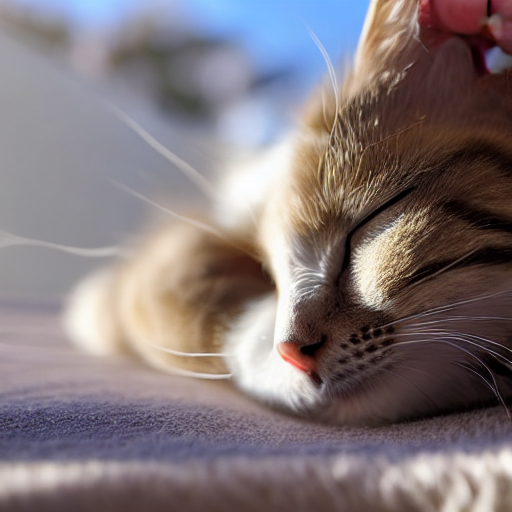

In [10]:
prompt = "a sleeping cat enjoying the sunshine."
image = pipe(prompt, num_inference_steps=25).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
# image.save(f"lovely_cat_sun.png")
image

### Adding Negative prompt

Adding negative prompt can control what you do not want.

  0%|          | 0/50 [00:00<?, ?it/s]

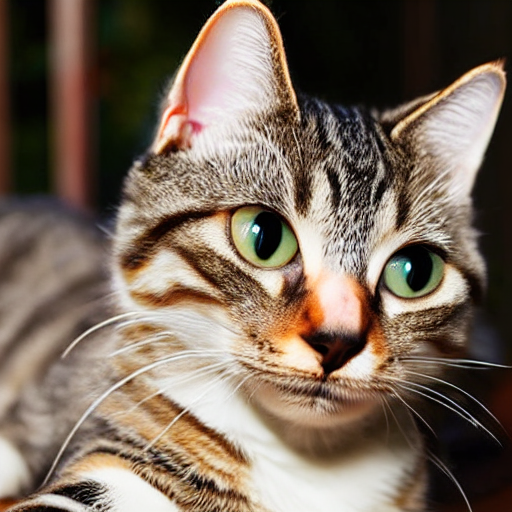

In [25]:
prompt = "tabby cat with grey and white color"
image = pipe(prompt, generator=generator,
               negative_prompt="water and sea").images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"lovely_cat_sun_no_trees.png")
image